In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


## Veri seti olarak hem günlük covid-19 sonuçlarını hem de ülkelere göre covid 19 u analiz ettim. 

In [2]:
day_report = pd.read_csv("/kaggle/input/corona-virus-report/day_wise.csv")
country_wise = pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")

### ilk olarak günlük analizlere baktım

In [3]:
day_report.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [4]:
#tarih sütununu datetime formatına çevirme
day_report["Date"] = pd.to_datetime(day_report["Date"])

In [6]:
#Aykırı değer temizleme
numeric_cols = day_report.select_dtypes(include='number')

# IQR hesapla
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırları belirle
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değer maskesi oluştur
outlier_mask = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)

# Kaç satır aykırı?
print("Aykırı değer içeren satır sayısı:", outlier_mask.sum())

# Aykırı değerler hariç tutulmuş veri seti
day_report_cleaned = day_report[~outlier_mask].reset_index(drop=True)

Aykırı değer içeren satır sayısı: 22


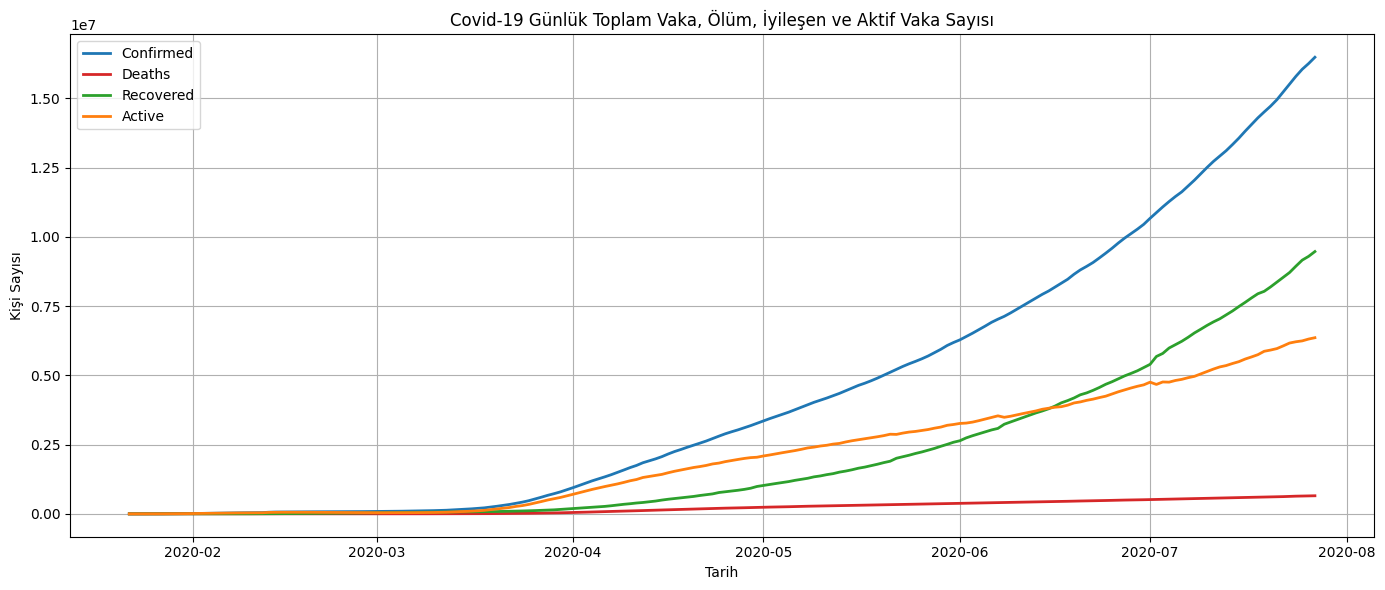

In [7]:
#Covid-19 Günlük Toplam Vaka, Ölüm, İyileşen ve Aktif Vaka Sayısı grafiği

import matplotlib.pyplot as plt
import seaborn as sns

colors = {
    'Confirmed': '#1f77b4',   # mavi
    'Deaths': '#d62728',      # kırmızı
    'Recovered': '#2ca02c',   # yeşil
    'Active': '#ff7f0e'       # turuncu
}

plt.figure(figsize=(14, 6))
plt.plot(day_report['Date'], day_report['Confirmed'], label='Confirmed', color=colors['Confirmed'],linewidth=2)
plt.plot(day_report['Date'], day_report['Deaths'], label='Deaths',  color=colors['Deaths'], linewidth=2)
plt.plot(day_report['Date'], day_report['Recovered'], label='Recovered', color=colors['Recovered'], linewidth=2)
plt.plot(day_report['Date'], day_report['Active'], label='Active', color=colors['Active'], linewidth=2)
plt.title('Covid-19 Günlük Toplam Vaka, Ölüm, İyileşen ve Aktif Vaka Sayısı')
plt.xlabel('Tarih')
plt.ylabel('Kişi Sayısı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

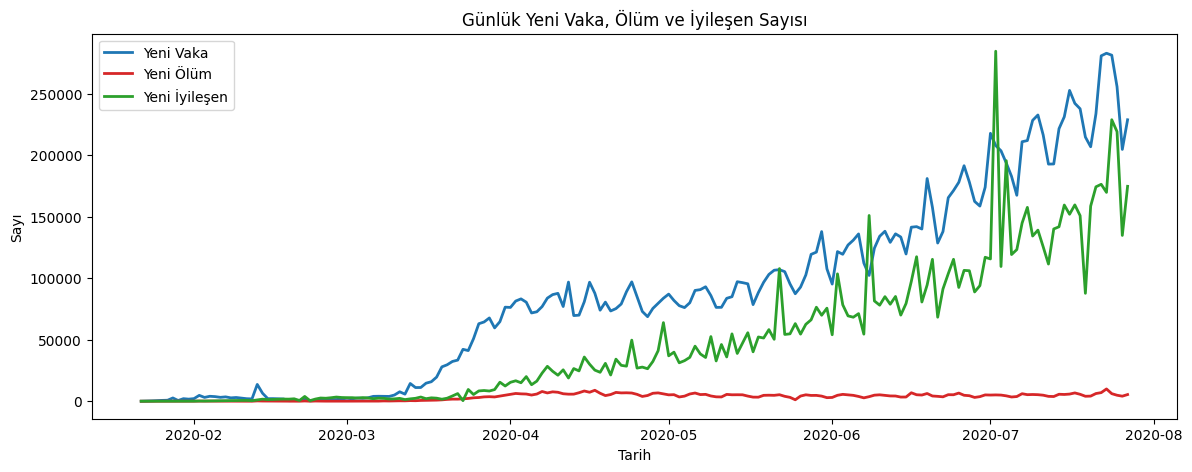

In [8]:
# Günlük Yeni Vaka, Ölüm ve İyileşen Sayısı grafiği

plt.figure(figsize=(14, 5))
sns.lineplot(data=day_report, x='Date', y='New cases', label='Yeni Vaka', color=colors['Confirmed'],linewidth=2)
sns.lineplot(data=day_report, x='Date', y='New deaths', label='Yeni Ölüm', color=colors['Deaths'], linewidth=2)
sns.lineplot(data=day_report, x='Date', y='New recovered', label='Yeni İyileşen',  color=colors['Recovered'], linewidth=2)
plt.title('Günlük Yeni Vaka, Ölüm ve İyileşen Sayısı')
plt.xlabel('Tarih')
plt.ylabel('Sayı')
plt.legend()
plt.show()

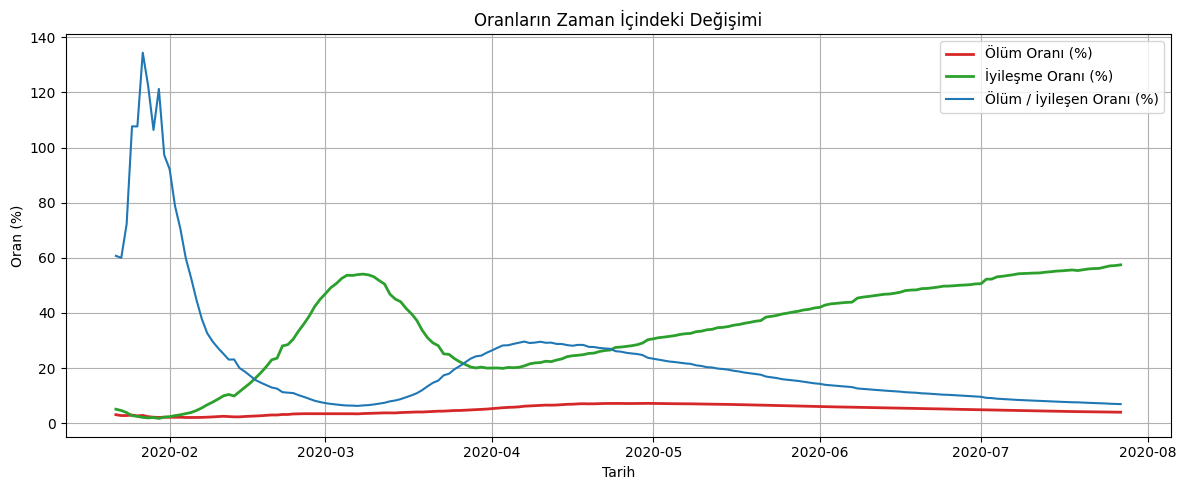

In [9]:
# ölüm / iyileşme oranı grafiği

plt.figure(figsize=(12, 5))
plt.plot(day_report['Date'], day_report['Deaths / 100 Cases'], label='Ölüm Oranı (%)', color=colors['Deaths'], linewidth=2)
plt.plot(day_report['Date'], day_report['Recovered / 100 Cases'], label='İyileşme Oranı (%)', color=colors['Recovered'], linewidth=2)
plt.plot(day_report['Date'], day_report['Deaths / 100 Recovered'], label='Ölüm / İyileşen Oranı (%)')
plt.title('Oranların Zaman İçindeki Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Oran (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


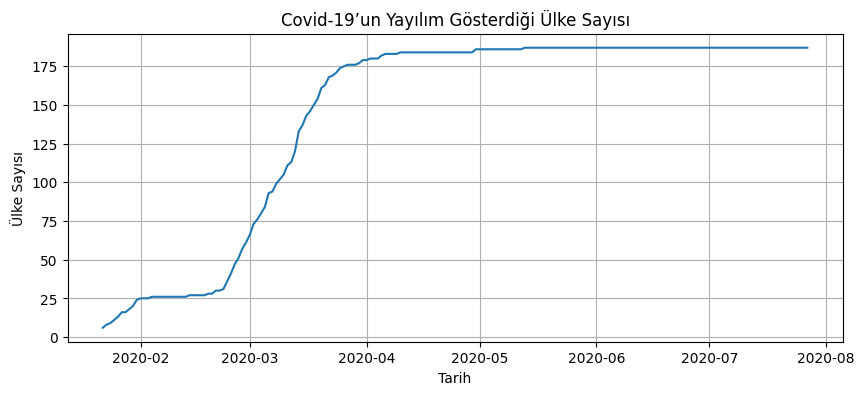

In [10]:
#covid-19 un yayılım gösterdiği ülkeler grafiği

plt.figure(figsize=(10, 4))
sns.lineplot(data=day_report, x='Date', y='No. of countries')
plt.title('Covid-19’un Yayılım Gösterdiği Ülke Sayısı')
plt.xlabel('Tarih')
plt.ylabel('Ülke Sayısı')
plt.grid(True)
plt.show()

In [11]:
# Genel özet
day_report.describe()

# Belirli günlerdeki en yüksek artışlar
day_report.sort_values('New cases', ascending=False).head(5)
day_report.sort_values('New deaths', ascending=False).head(5)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
86,2020-04-17,2250439,157481,554287,1538671,87724,8890,25272,7.00,24.63,28.41,184
84,2020-04-15,2066003,141308,498925,1425770,80829,8312,35911,6.84,24.15,28.32,184
76,2020-04-07,1413849,86915,293665,1033269,76873,7902,22853,6.15,20.77,29.60,183
78,2020-04-09,1584249,101279,346349,1136621,86625,7629,24332,6.39,21.86,29.24,183


## Ülkelere göre dağılım

In [12]:
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


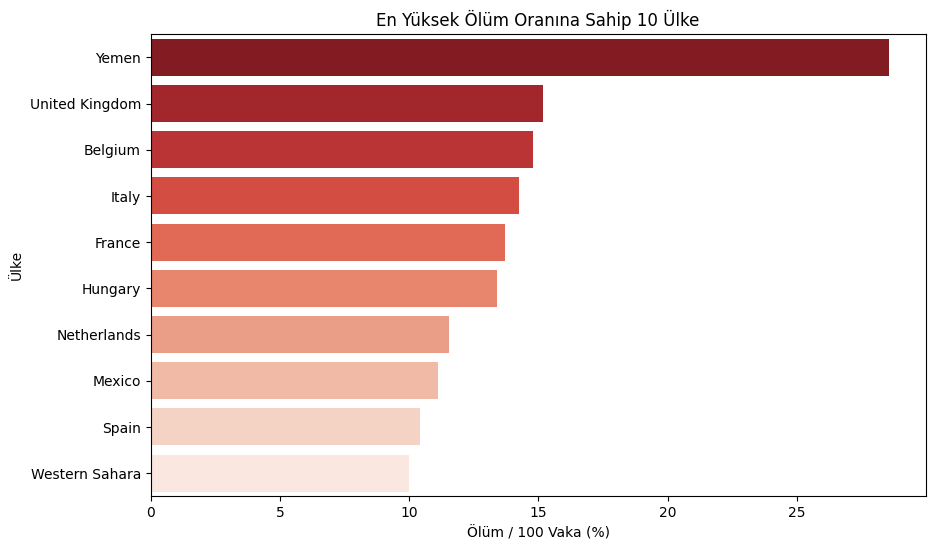

In [13]:
# Ölüm oranı en yüksek 10 ülke
top_death_rate = country_wise.sort_values('Deaths / 100 Cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_death_rate, y='Country/Region', x='Deaths / 100 Cases', palette='Reds_r')
plt.title('En Yüksek Ölüm Oranına Sahip 10 Ülke')
plt.xlabel('Ölüm / 100 Vaka (%)')
plt.ylabel('Ülke')
plt.show()

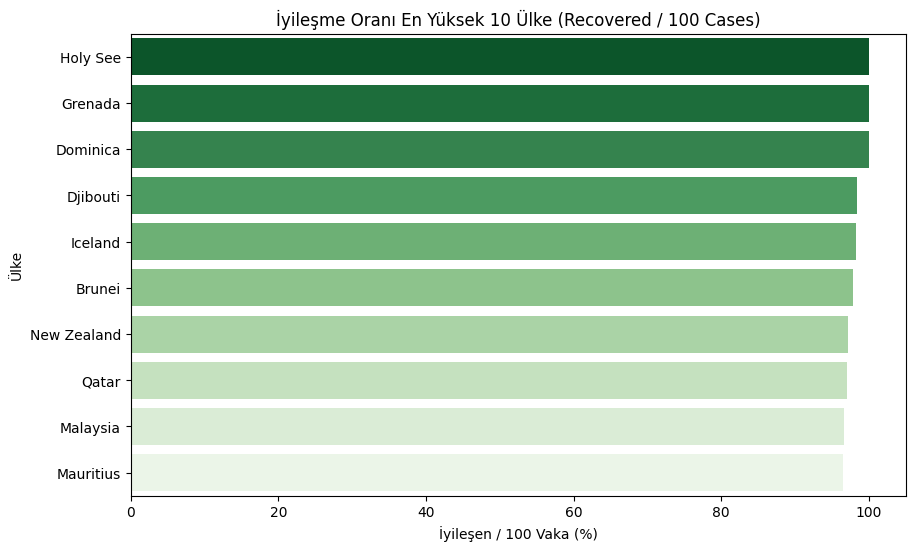

In [16]:
#iyileşme oranı en yüksek 10 ülke

top_recovered_rate = country_wise.sort_values('Recovered / 100 Cases', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Recovered / 100 Cases', y='Country/Region', data=top_recovered_rate, palette='Greens_r')
plt.title('İyileşme Oranı En Yüksek 10 Ülke (Recovered / 100 Cases)')
plt.xlabel('İyileşen / 100 Vaka (%)')
plt.ylabel('Ülke')
plt.show()

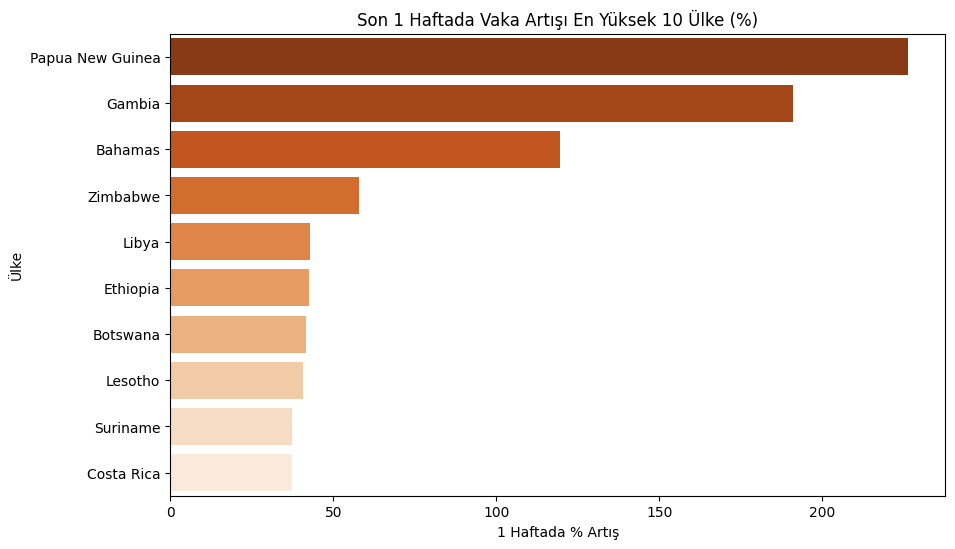

In [17]:
#1 hafta % artışı en yüksek 10 ülke

top_week_increase = country_wise.sort_values('1 week % increase', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_week_increase, palette='Oranges_r')
plt.title('Son 1 Haftada Vaka Artışı En Yüksek 10 Ülke (%)')
plt.xlabel('1 Haftada % Artış')
plt.ylabel('Ülke')
plt.show()

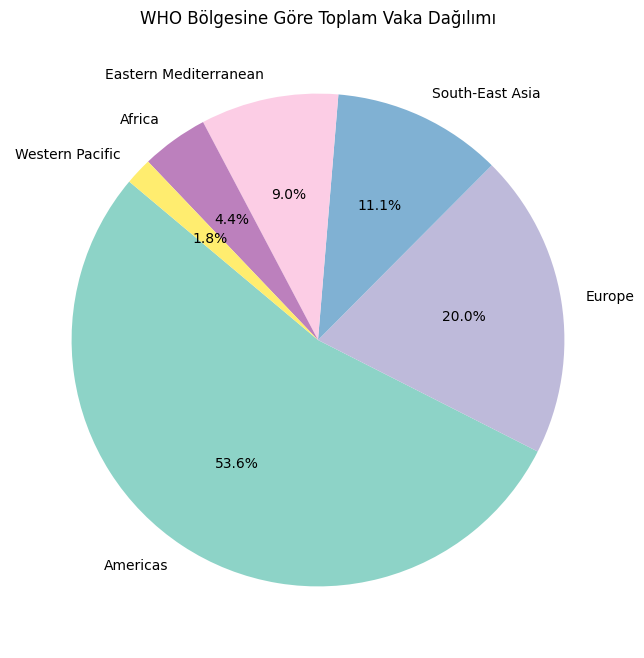

In [18]:
#WHO bölgesine göre toplam vaka dağılımı
region_sum = country_wise.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
region_sum.plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('WHO Bölgesine Göre Toplam Vaka Dağılımı')
plt.ylabel('')  # Pie chart için gereksiz
plt.show()

In [20]:
#ülkelere göre vaka dağılımı

import plotly.express as px

# Ülke bazlı vaka sayısı ile harita
fig = px.choropleth(country_wise,
                    locations="Country/Region",
                    locationmode="country names",
                    color="Confirmed",
                    hover_name="Country/Region",
                    color_continuous_scale="Reds",
                    title="Dünya Haritasında Ülke Bazında Toplam Vaka Sayısı (WHO Bölge Renkleri Olmadan)")

fig.show()